In [1]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from scipy import optimize

In [9]:
# load data, we will predict the matter density from astrophysical parameters of galaxies
foffset = "data/offset_IllustrisTNG_z=0.txt"
fcosmo = "data/latin_hypercube_params_IllustrisTNG.txt"
fgals = "data/galaxies_IllustrisTNG_z=0.txt"

offsets = np.loadtxt(foffset)
cosmos = np.loadtxt(fcosmo)
ncosmo = cosmos.shape[0]
gals = np.loadtxt(fgals)

Om = cosmos[:,0] # 0 is Om, 1 is sigma8, 2 Neff
offset = offsets[:,0].astype(int)
ngals = offsets[:,1].astype(int)
pgals = gals
totgals = gals.shape[0]

print(pgals.shape)

(720548, 14)


In [5]:
# attach cosmo to astro paramsm some re-arranging
pgals_ext = []
i = 0
for icosmo in range(ncosmo):
    ioffset = offset[icosmo]
    for igal in range(ngals[icosmo]):
        igaltot = ioffset+igal
        pgals_aux = np.append(pgals[igaltot],Om[icosmo]) 
        pgals_ext.append(pgals_aux)
        i+=1
print(np.shape(pgals_ext))
print(pgals_ext[0:2])      

(720548, 15)
[array([9.282650e+12, 5.420345e+11, 1.466206e+09, 6.418189e+13,
       7.285484e+02, 3.888218e+02, 4.786963e-03, 1.794660e-02,
       9.441491e+00, 7.318448e+03, 3.348256e+01, 2.128782e-02,
       2.651752e-01, 1.957446e-01, 3.090000e-01]), array([1.038497e+11, 2.636133e+10, 1.044907e+07, 9.836553e+11,
       2.339234e+02, 1.198190e+02, 1.828553e-02, 1.576049e-02,
       2.637218e+00, 1.866937e+03, 5.142365e+02, 5.121960e-03,
       4.471239e-02, 1.530221e-02, 3.090000e-01])]


In [6]:
import shap
import sklearn
gals_subp = np.asarray(pgals_ext)[:1000,0:14] # params other than Om
Om = np.array(pgals_ext)[:1000,14] # Om
X = gals_subp
y = Om

X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution

# linear regression
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

#coefficients
# for i in range(X.shape[1]):
#    print(X[i])

LinearRegression()

In [7]:
# compute SHAP values for the model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)


Permutation explainer: 1001it [00:10,  2.06it/s]                                                                                                                                                           


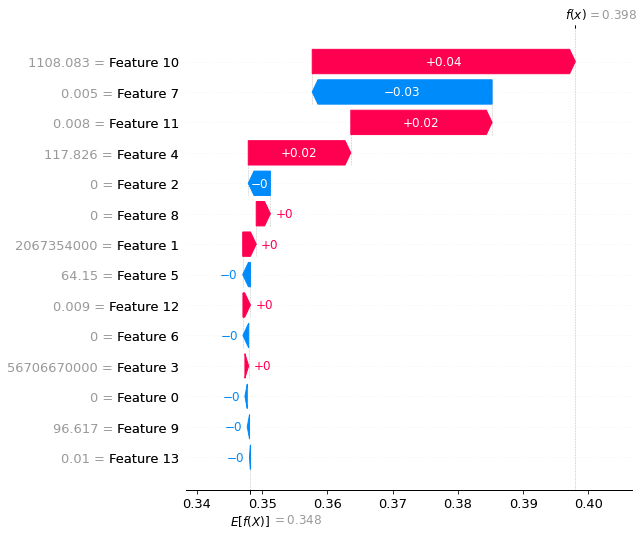

In [8]:
# plot values
sample_ind = 10
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

# parameter_set = ['Mg','M*','MBH','Mt','Vmax','sigmav','Zg','Z*','SFR','spin','vp','R*','Rt','Rmax','Om']